In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download dataset from this [drive](https://drive.google.com/drive/folders/1_DsGmG4vCvFEcZRylzbeP-MatfSIWMtX?usp=sharing)

In [ ]:
import os

train_telur = os.path.join('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/train/telur')

train_tempe = os.path.join('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/train/tempe')

valid_telur = os.path.join('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/val/telur')

valid_tempe = os.path.join('/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/val/tempe')

In [ ]:
train_telur_names = os.listdir(train_telur)
print(train_telur_names[:10])

train_tempe_names = os.listdir(train_tempe)
print(train_tempe_names[:10])

validation_telur_hames = os.listdir(valid_telur)
print(validation_telur_hames[:10])

validation_tempe_names = os.listdir(valid_tempe)
print(validation_tempe_names[:10])

['J5fegs1y7rMFM1InOp4LArEXQuVT10M8-31363136303638383735d41d8cd98f00b204e9800998ecf8427e.jpg', 'DSC07306.jpg', '7532b2c8-66f4-4492-a856-7b4a5ccc9468.jpg', 'fotojet-1-5fdbb1ebd541df74de4a58c2.jpg', 'aza_aaj1311_272978115_304082905022704_1813837453637351597_n.jpg', 'resep-telur-dadar-padang-MAHI-1.jpg', 'HappyFresh_Recipe-Template_Blog_Ajinomoto_telur-dadar-1.jpg', 'Telur Dadar Goreng Tepung_L.jpg', 'images (2).jpeg', 'images (1).jpeg']
['images.jpeg', 'images (1).jpeg', 'images (2).jpeg', 'images (3).jpeg', 'images (4).jpeg', 'images (7).jpeg', 'images (11).jpeg', 'images (13).jpeg', 'images (12).jpeg', 'images (15).jpeg']
['J5fegs1y7rMFM1InOp4LArEXQuVT10M8-31363136303638383735d41d8cd98f00b204e9800998ecf8427e.jpg', 'DSC07306.jpg', 'HappyFresh_Recipe-Template_Blog_Ajinomoto_telur-dadar-1.jpg', 'fotojet-1-5fdbb1ebd541df74de4a58c2.jpg', 'aza_aaj1311_272978115_304082905022704_1813837453637351597_n.jpg', 'resep-telur-dadar-padang-MAHI-1.jpg', '7532b2c8-66f4-4492-a856-7b4a5ccc9468.jpg', 'image

In [ ]:
print('total training telur images:', len(os.listdir(train_telur)))
print('total training tempe images:', len(os.listdir(train_tempe)))
print('total validation telur images:', len(os.listdir(valid_telur)))
print('total validation tempe images:', len(os.listdir(valid_tempe)))

total training telur images: 100
total training tempe images: 87
total validation telur images: 45
total validation tempe images: 37


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

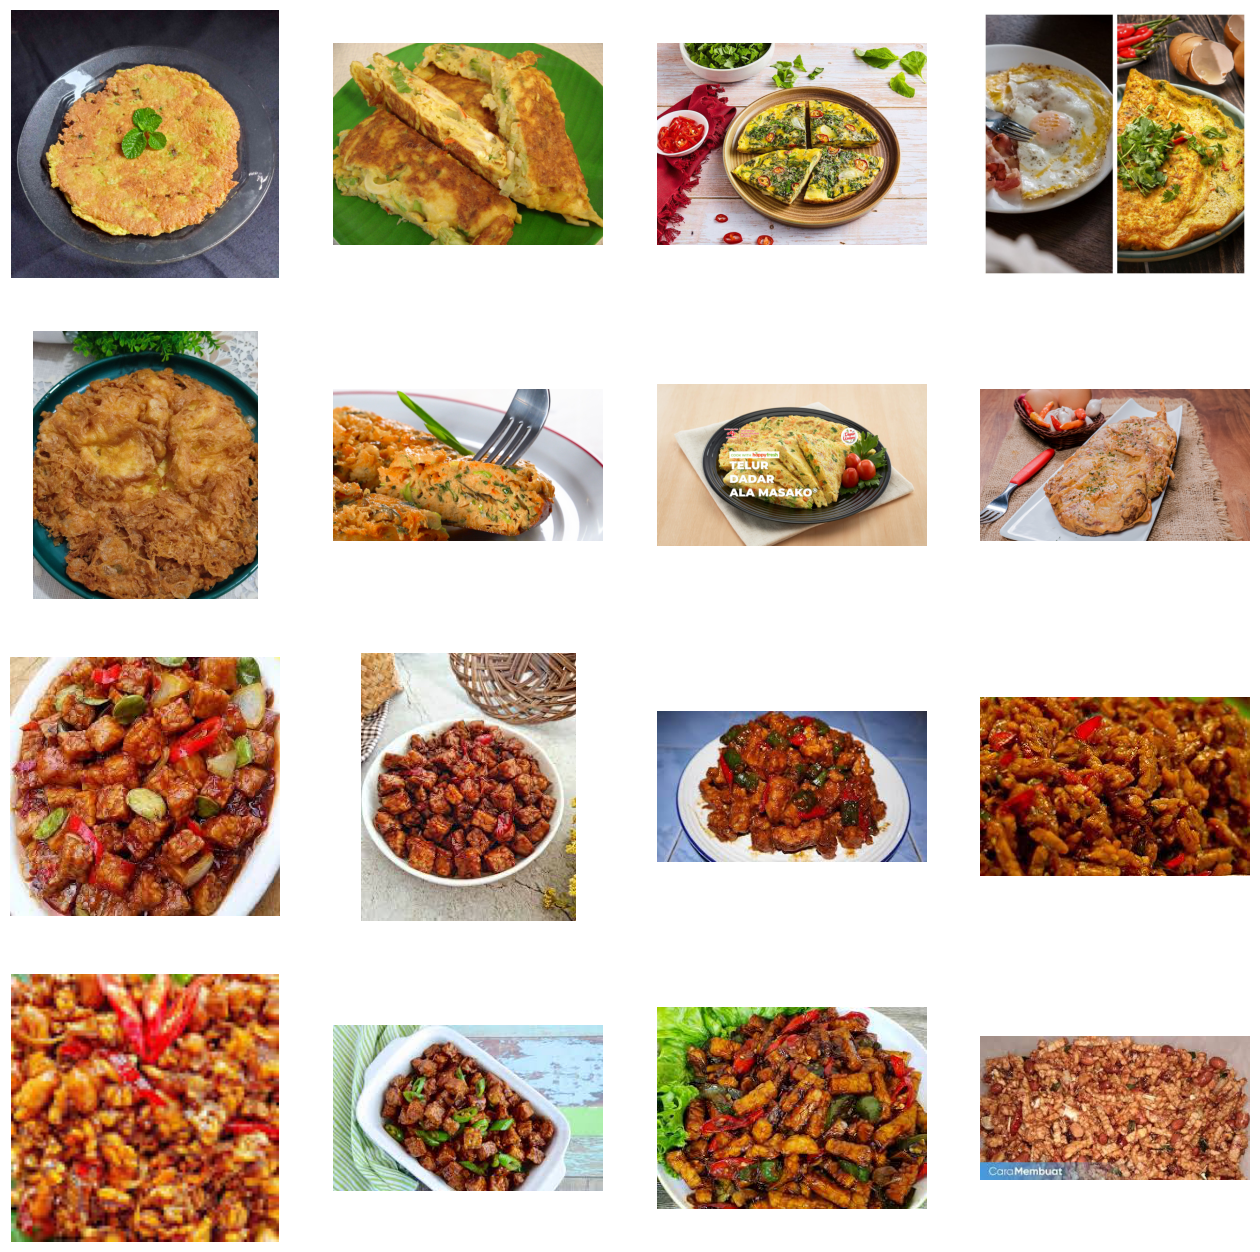

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_telur_pic = [os.path.join(train_telur, fname) 
                for fname in train_telur_names[pic_index-8:pic_index]]
next_tempe_pic = [os.path.join(train_tempe, fname) 
                for fname in train_tempe_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_telur_pic + next_tempe_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/train',  # This is the source directory for training images
        classes = ['telur', 'tempe'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=32,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/Dataset/dataset/val',  # This is the source directory for training images
        classes = ['telur', 'tempe'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 187 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras.models import Sequential
# from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
# from keras.preprocessing.image import ImageDataGenerator
def create_model():
    model = tf.keras.models.Sequential([

        # Conv Layer pertama
        tf.keras.layers.Conv2D(200, (3,3), activation = 'relu', input_shape=(200,200, 3)),
        tf.keras.layers.MaxPooling2D(2,2),

        # Conv Layer kedua
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Conv Layer ketiga
        tf.keras.layers.Conv2D(72, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Conv Layer keempat
        tf.keras.layers.Conv2D(36, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Conv Layer kelima
        tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Flatten
        tf.keras.layers.Flatten(),

        # Fully Connected Layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
# model.summary()

In [ ]:
model = create_model()

# Train your model
history = model.fit(train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
6/6 [==============================] - 55s 7s/step - loss: 0.6976 - accuracy: 0.5027 - val_loss: 0.6726 - val_accuracy: 0.5488
Epoch 2/10
6/6 [==============================] - 3s 442ms/step - loss: 0.6267 - accuracy: 0.6952 - val_loss: 0.4670 - val_accuracy: 0.8537
Epoch 3/10
6/6 [==============================] - 3s 451ms/step - loss: 0.5105 - accuracy: 0.7968 - val_loss: 0.2808 - val_accuracy: 0.8902
Epoch 4/10
6/6 [==============================] - 2s 382ms/step - loss: 0.3730 - accuracy: 0.8342 - val_loss: 0.4615 - val_accuracy: 0.8171
Epoch 5/10
6/6 [==============================] - 2s 365ms/step - loss: 0.3404 - accuracy: 0.8877 - val_loss: 0.3032 - val_accuracy: 0.8659
Epoch 6/10
6/6 [==============================] - 2s 390ms/step - loss: 0.2564 - accuracy: 0.9144 - val_loss: 0.2016 - val_accuracy: 0.8902
Epoch 7/10
6/6 [==============================] - 3s 479ms/step - loss: 0.1771 - accuracy: 0.9358 - val_loss: 0.2868 - val_accuracy: 0.9024
Epoch 8/10
6/6 [======

In [ ]:
model.evaluate(validation_generator)

5/5 [==============================] - 1s 81ms/step - loss: 0.2100 - accuracy: 0.9024


[0.20998698472976685, 0.9024389982223511]

Kalkulasi ROC curve dan lakukan plotting.

Lakukan prediction di validation set. Ketika menggunakan generators untuk membuat predictions, Kita matikan shuffle (seperti yang kita lakukan ketika kita membuat validation_generator) dan reset the generator:

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

5/5 [==============================] - 1s 95ms/step


Untuk membuat ROC curve dan AUC, kita harus menghitung false-positive rate dan  true-positive rate:

In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

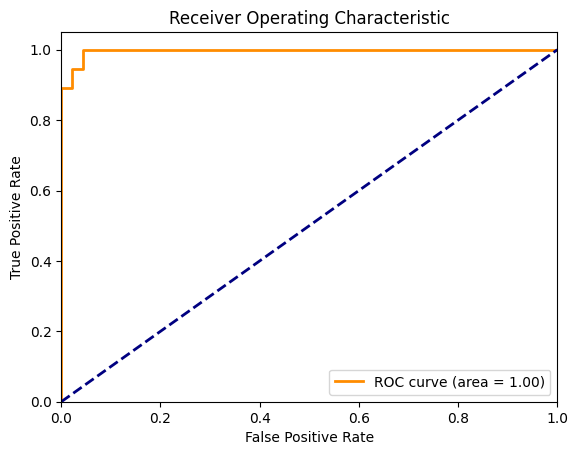

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

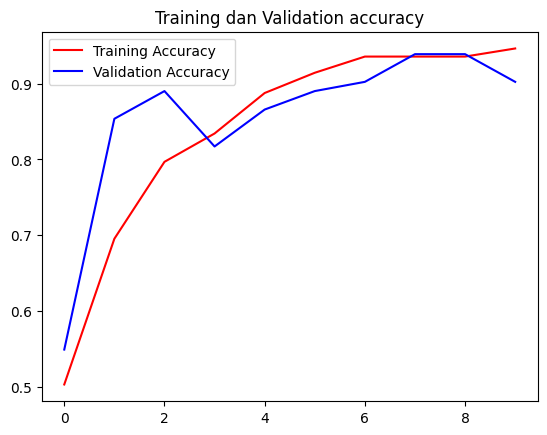

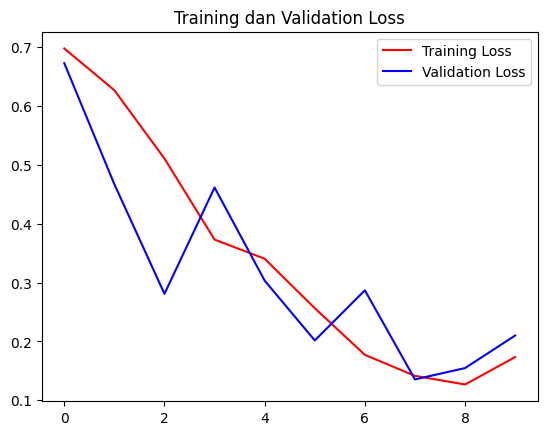

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt. title('Training dan Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = "Validation Loss")
plt. title('Training dan Validation Loss')
plt.legend(loc = 'best')
plt.show()


In [ ]:
model.save('model_cv.h5')

Saving tempe.jpeg to tempe.jpeg
1/1 [==============================] - 0s 23ms/step
0
tempe.jpeg ini adalah telur
Prediction: Incorrect
Accuracy: 0.0 %


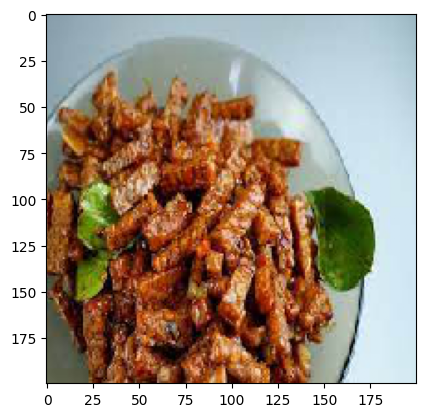

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

# Prepare variables for accuracy calculation
total_predictions = 0
correct_predictions = 0

for fn in uploaded.keys():
    # Predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    plt.imshow(x/255.)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(x)
    print(np.argmax(classes))
    if classes[0] < 0.5:
        print(fn + " ini adalah telur")
        prediction = "telur"
    else:
        print(fn + " ini adalah tempe")
        prediction = "tempe"

    # Update accuracy variables
    total_predictions += 1
    if ((classes[0] < 0.5 and fn.startswith("telur")) or
            (classes[0] >= 0.5 and fn.startswith("tempe"))):
        correct_predictions += 1

    # Display prediction accuracy
    if fn.startswith("telur") or fn.startswith("tempe"):
        if fn.startswith(prediction):
            print("Prediction: Correct")
        else:
            print("Prediction: Incorrect")
    else:
        print("Prediction: Not Both")

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print("Accuracy:", round(accuracy, 2), "%")


Saving tempe2.jpeg to tempe2.jpeg
1/1 [==============================] - 0s 20ms/step
0
tempe2.jpeg ini adalah tempe


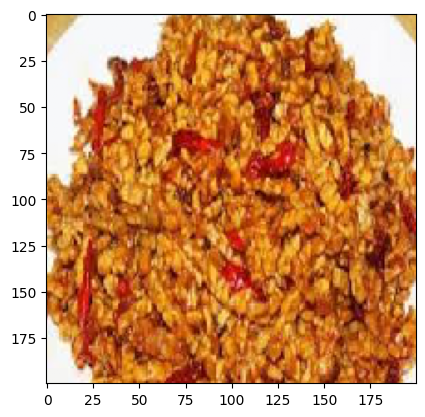

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(x)
  print(np.argmax(classes))
  if classes[0]<0.5:
    print(fn + " ini adalah telur")
  else:
    print(fn + " ini adalah tempe")
 

## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)